<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Resub-DS-assignments-1-3/blob/main/Decision%20trees(Fraud_check).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path = r"/content/Fraud_check.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data['Taxable.Income'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')
X = data.drop('Taxable.Income', axis=1)
y = data['Taxable.Income']

In [5]:
print(data.head())

  Undergrad Marital.Status Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           Good            50047               10   
1       YES       Divorced           Good           134075               18   
2        NO        Married           Good           160205               30   
3       YES         Single           Good           193264               15   
4        NO        Married           Good            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO  


<Axes: xlabel='Taxable.Income', ylabel='count'>

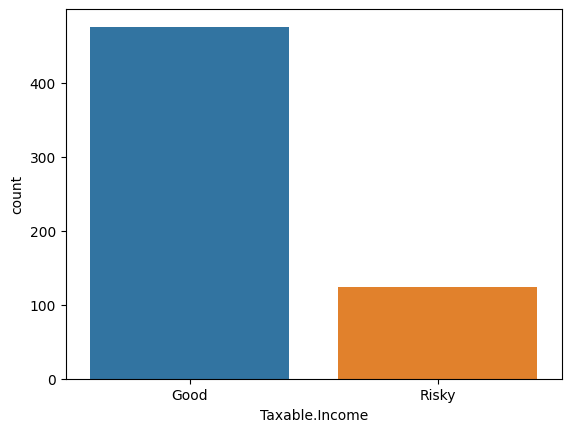

In [6]:
sns.countplot(x='Taxable.Income', data=data)

<ipython-input-7-0a0cea474d03>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


<Axes: >

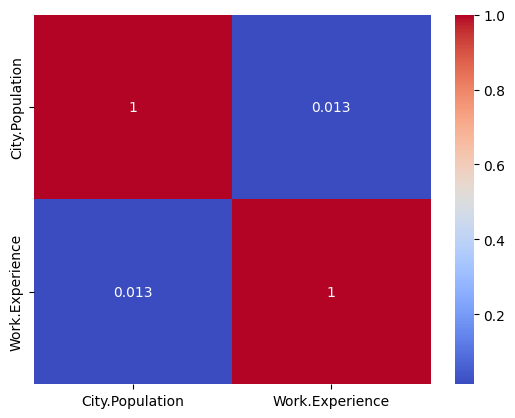

In [7]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [21]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)


In [22]:
clf = DecisionTreeClassifier()
clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [23]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7]}
grid_search = GridSearchCV(clf, params, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7]})

In [28]:
pruned_clf = DecisionTreeClassifier(**grid_search.best_params_)
pruned_clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=5)

In [29]:
y_pred = pruned_clf.predict(X_test_encoded)

In [30]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        Good       0.79      0.90      0.84        94
       Risky       0.25      0.12      0.16        26

    accuracy                           0.73       120
   macro avg       0.52      0.51      0.50       120
weighted avg       0.67      0.73      0.69       120

Confusion Matrix:
[[85  9]
 [23  3]]


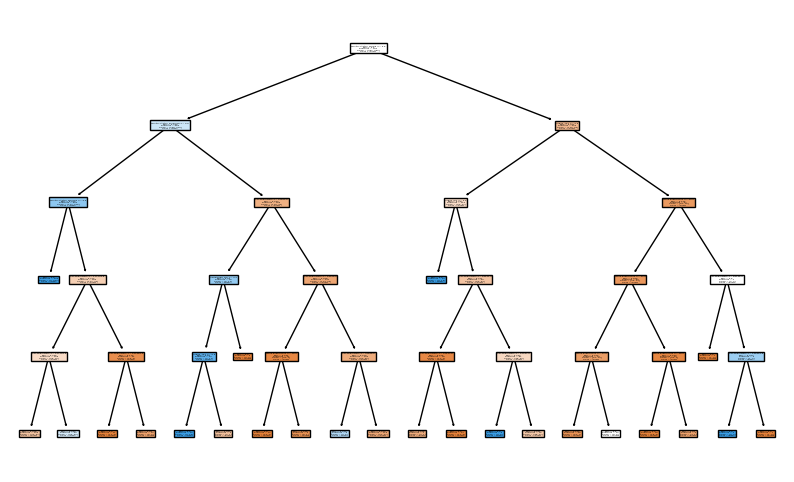

In [31]:
plt.figure(figsize=(10, 6))
plot_tree(pruned_clf, feature_names=X_train_encoded.columns, class_names=['Good', 'Risky'], filled=True)
plt.show()

In [32]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X_train_resampled):
    X_train_fold, X_val_fold = X_train_resampled.iloc[train_index], X_train_resampled.iloc[val_index]
    y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[val_index]

    clf_fold = DecisionTreeClassifier(**grid_search.best_params_)
    clf_fold.fit(X_train_fold, y_train_fold)

    y_val_pred = clf_fold.predict(X_val_fold)

In [33]:
print("Fold Results:")
print(classification_report(y_val_fold, y_val_pred))
print("--------------------")

Fold Results:
              precision    recall  f1-score   support

        Good       0.69      1.00      0.82        71
       Risky       1.00      0.60      0.75        81

    accuracy                           0.79       152
   macro avg       0.84      0.80      0.78       152
weighted avg       0.85      0.79      0.78       152

--------------------
